In [1]:
# Lab 4 Multi-variable linear regression
import tensorflow as tf
import numpy as np

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

In [4]:
model = tf.keras.Sequential()

In [5]:
model.add(tf.keras.layers.Dense(units=1, input_dim=3))  # input_dim=3 gives multi-variable regression

In [6]:
model.add(tf.keras.layers.Activation('linear'))  # this line can be omitted, as linear activation is default
# advanced reading https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

In [7]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_data, y_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 23686.0352
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 7426.9038
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 2330.5269
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 733.0815
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 232.3665
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 75.4174
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 26.2208
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 10.7991
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 5.9638
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 4.4469
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 3.9701
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 3.8193
Epoch 13/100
1/1 [===========================

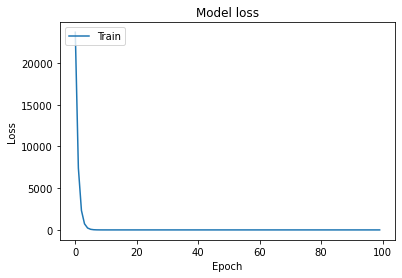

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
y_predict = model.predict(np.array([[72., 93., 90.]]))

In [12]:
print(y_predict)

[[157.23247]]
